<a href="https://colab.research.google.com/github/guitar79/OA-2018/blob/master/08_5_combine_fits_file_mono_16bit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Combine fits file**


* 이 자료는 천체사진을 위한 16 bit mono Fits file을 combine 하는 방법에 대한 설명이다.

* python이 처음이라면 [Python Basic](https://colab.research.google.com/drive/1PCOoDIKypPVX9KTItMOht1cl96cPmeR_?authuser=1#scrollTo=3g6o04iLM0AF), [Python packages](https://colab.research.google.com/drive/1-1wx2VPEyNe11bmgpSpwdQgrJASCAqdH?authuser=1)를 먼저 학습하기를 권한다.

* package를 쉽게 설치하기 위해 Anaconda 사용을 권장한다.

경기과학고등학교 관측천문학 강좌를 위해 만들었으며  <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">크리에이티브 커먼즈 저작자표시-비영리-동일조건변경허락 4.0 국제 라이선스</a>에 따라 이용할 수 있음.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="크리에이티브 커먼즈 라이선스" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>

#Download data

같은 대상을 촬영 후 alignment가 완료된 사진을 combine 해 보자.
[example fits files](https://drive.google.com/open?id=1fMPbzoPi4JBbl9iUZHTl9dF5T5IGPf5L)  파일을 다운받는다.

다운받은 사진은 적당한 폴더에 압축을 푼다. 

# numpy 이용

일괄작업을 위해 file 이름들을 list 형태로 저장해보자.

In [2]:
!pip install astropy
#위 코드는 이곳 notebook에서만 필요합니다. 다른곳에서는 주석 처리하시기 바랍니다.

import numpy as np
import cv2
from astropy.io import fits
from astropy.stats import sigma_clip
import matplotlib.pyplot as plt

img_names = ['NGC2244-001R_aligned.FIT', 'NGC2244-002R_aligned.FIT',\
            'NGC2244-003R_aligned.FIT','NGC2244-004R_aligned.FIT',\
            'NGC2244-005R_aligned.FIT','NGC2244-006R_aligned.FIT']

print('img_names',  img_names)
print('img_names[0]',  img_names[0])

img_names ['NGC2244-001R_aligned.FIT', 'NGC2244-002R_aligned.FIT', 'NGC2244-003R_aligned.FIT', 'NGC2244-004R_aligned.FIT', 'NGC2244-005R_aligned.FIT', 'NGC2244-006R_aligned.FIT']
img_names[0] NGC2244-001R_aligned.FIT


픽셀 값들을 저장할 list_images 라는 이름의 빈 리스트를 만들어 픽셀 값들을 저장하는 코드이다. 



In [3]:
#
list_images = []
for img_name in(img_names):
    hdu = fits.open(img_name)
    data = hdu[0].data
    image_data = np.array(data, dtype=np.uint16)
    list_images.append(image_data)
print('list_images',  list_images)
print('iist_images[0]',  list_images[0])

list_images [array([[2354, 2360, 2377, ...,    0,    0,    0],
       [2399, 2304, 2314, ...,    0,    0,    0],
       [2393, 2331, 2327, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=uint16), array([[2342, 2418, 2475, ...,    0,    0,    0],
       [2370, 2406, 2429, ...,    0,    0,    0],
       [2359, 2341, 2375, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=uint16), array([[2401, 2360, 2359, ...,    0,    0,    0],
       [2413, 2386, 2351, ...,    0,    0,    0],
       [2398, 2404, 2389, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=uint16), arr

픽셀 값들의 평균을 구하여 파일을 png로 저장하고, 화면에 display 해 보자.

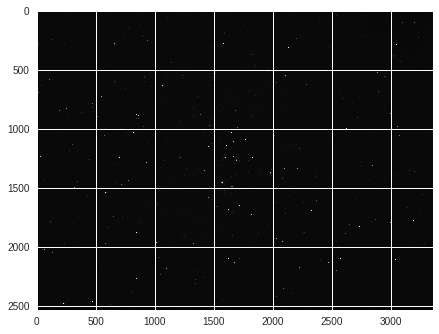

In [4]:
#combine image using algned_images:            
mean_image = np.mean(list_images, axis=0).astype(dtype=np.uint16)
cv2.imwrite('NGC2244-R-mean_image.png', mean_image)

# show fits file 
plt.imshow(mean_image, cmap = 'gray', interpolation = 'None')
plt.show()


픽셀 값들의 중간값을 구하여 파일을 png로 저장하고, 화면에 display 해 보자.

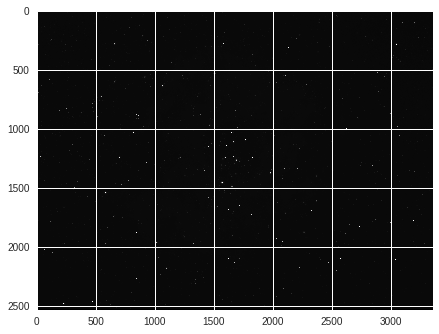

In [5]:
median_image = np.median(list_images, axis=0).astype(dtype=np.uint16)
cv2.imwrite('NGC2244-R-median_image.png', median_image)

# show fits file 
plt.imshow(median_image, cmap = 'gray', interpolation = 'None')
plt.show()

픽셀 값들의 sigma clip을 구하여 파일을 png로 저장하고, 화면에 display 해 보자.

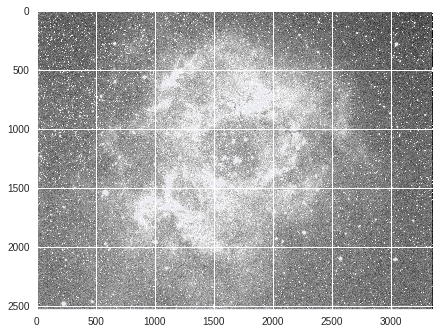

In [6]:
sigma_clip_image = sigma_clip(list_images, sigma=3, \
            sigma_lower=None, sigma_upper=None, iters=5, axis=None, copy=True)
cv2.imwrite('NGC2244-R-sigma_clip_image.png', sigma_clip_image[0])

# show fits file 
plt.imshow(sigma_clip_image[0], cmap = 'gray', interpolation = 'None')
plt.show()

정리 차원에서 최종 코드를 첨부한다.

* [full code](https://github.com/guitar79/OA-2018/blob/master/08-5.combine_fits_files_mono_16bit_numpy.py)

# ccdproc 이용

ccdproc를 이용하기 위해서는 먼저 설치를 해야 한다.

terminal windows에서 아래와 같이 입력해 보자. 
(이 과정은 10분 정도 소요될 수 있다.)

>conda update --all

>conda config --add channels http://ssb.stsci.edu/astroconda

> conda install -c astropy ccdproc

 설치가 끝났으면 다음과 같이 합성하고자 하는 파일의 목록을 만들어야 합니다.

In [8]:
!pip install ccdproc
#위 코드는 이곳 notebook에서만 필요합니다. 다른곳에서는 주석 처리하시기 바랍니다.
import numpy as np
import cv2
from ccdproc import combine
import matplotlib.pyplot as plt

filelist = np.loadtxt('file.list', dtype=bytes).astype(str)
f_name_output = 'combined1.fits'
bias = combine(filelist.tolist(),       # ccdproc does not accept numpy.ndarray, but only python list.
               #output_file = f_name_output, # I want to save the combined image
               method='median',         # default is average so I specified median.
               unit='adu')              # unit is required: it's ADU in our case.

ccdproc는 기본 64bit로 연산하므로 16비트로 변환하여 저장하자.

그리고 화면에 diaplay 해 보자.

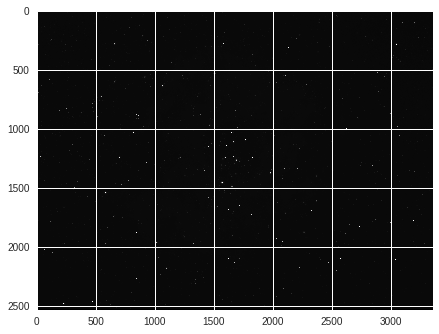

In [9]:
#convert to 16bit
bias.data = np.array(bias.data, dtype=np.uint16)
bias.write(f_name_output, overwrite =True)

#combine image using algned_images:            
cv2.imwrite('NGC2244-R-mean_image.png', bias.data)

# show fits file 
plt.imshow(bias.data, cmap = 'gray', interpolation = 'None')
plt.show()

정리 차원에서 최종 코드를 첨부한다.

* [full code](https://github.com/guitar79/OA-2018/blob/master/08-5.combine_fits_files_mono_16bit_ccdproc.py)